0.8140134165755325


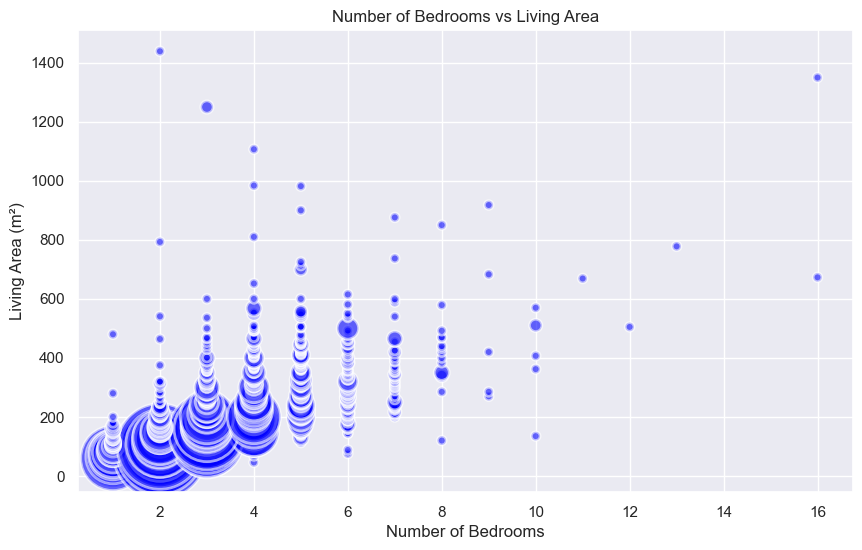

c:\Users\becod\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "
c:\Users\becod\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Pearson Chi-square ( 1.0) = ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  table.iloc[0,0] = f"Pearson Chi-square ({dof: .1f}) = "
c:\Users\becod\AppData\Local\Programs\Python\Python312\Lib\site-packages\researchpy\crosstab.py:146: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an 

AttributeError: 'Axes' object has no attribute 'show'

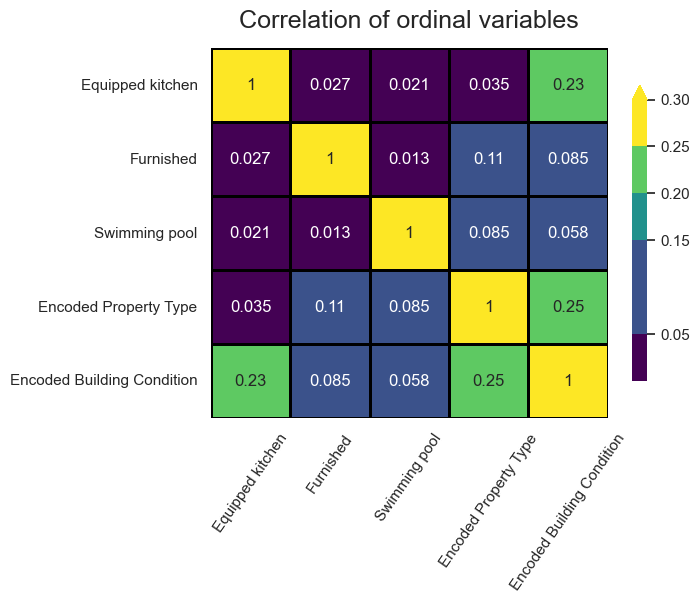

In [295]:
import pandas as pd
import  numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import researchpy as rp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

data = pd.read_csv("../Data/Cleaned/sanitized_property_listings_Kelli_final.csv")

# Removing outliers (price > 1mil)
data = data[data['Price'] < 1000000]

# Transforming qualitative into numerical
condition_counts = data['Building condition'].value_counts()
property_counts = data['Property type'].value_counts()
label_encoder_property_type = LabelEncoder()
label_encoder_condition = LabelEncoder()
data['Encoded Property Type'] = label_encoder_property_type.fit_transform(data['Property type'])
data['Encoded Building Condition'] = label_encoder_condition.fit_transform(data['Building condition'])



# CORRELATION BETWEEN NUMERICAL VARIABLES, NO NORMAL DISTRIBUTION
data_2 = data[['Number of bedrooms', 'Living area m²']]

# Print the correlation
print(data_2.corr(method='spearman').loc['Number of bedrooms', 'Living area m²'])

# Group and count the number of occurrences of each combination of 'Living area m²' and 'Number of bedrooms'
counts_per_livingarea = data.groupby(['Living area m²', 'Number of bedrooms']).size().reset_index(name='counts')
x = counts_per_livingarea['Number of bedrooms']
y = counts_per_livingarea['Living area m²']
sizes = counts_per_livingarea['counts'] * 40  # Adjust bubble size as needed for better visualization

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, alpha=0.6, color='blue', edgecolors="w", linewidth=2)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Living Area (m²)')
plt.title('Number of Bedrooms vs Living Area')

plt.show()


# CORRELATION BETWEEN NOMINAL VARIABLES WITH CRAMER'S V
data_3 = data[['Equipped kitchen', 'Furnished', 'Swimming pool', 'Encoded Property Type', 'Encoded Building Condition']]
data_cramersv = {}
for i in data_3.columns:
    item_list = []
    for j in data_3.columns:
        ctab, res = rp.crosstab(data[i], data[j], test="chi-square")
        item_list.append(res['results'][2])
    data_cramersv[i] = item_list

data_coiff = pd.DataFrame(data_cramersv)

# plotting the heatmap
    # creata a custom colorblind-friendly colormap
viridis_colors = plt.cm.viridis([0.0, 0.25, 0.25, 0.5, 0.75, 1.0])
custom_cmap = ListedColormap(viridis_colors)

hm = sns.heatmap(data = data_coiff, vmin=0.0, vmax=0.3, annot=True, linewidth=2, linecolor="black", yticklabels=['Equipped kitchen', 'Furnished', 'Swimming pool', 'Encoded Property Type', 'Encoded Building Condition'], cmap=custom_cmap, cbar_kws={'ticks': [.05, .15, .20, .25, .30], 'extend': 'max', 'shrink': 0.8})
plt.title('Correlation of ordinal variables', size=18, pad=15)
plt.xticks(rotation=55)
hm.show()
